In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('/home/asavari/Downloads/ecom')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
# selecting features
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
target = 'Yearly Amount Spent'
X = df[features].values
y = df[target].values.reshape(-1, 1)

In [5]:
# normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# bias term
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

In [7]:
# Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros((X.shape[1], 1))
    cost_history = []

    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [8]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [9]:
# training 
theta_final, cost_history = gradient_descent(X_b, y, learning_rate=0.01, iterations=1000)

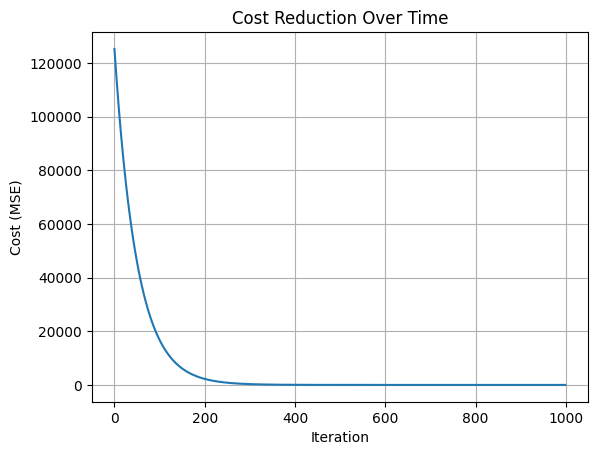

In [10]:
# cost over iterations
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction Over Time')
plt.grid(True)
plt.show()

In [11]:
print("Final Parameters (theta):")
print(theta_final.flatten())

Final Parameters (theta):
[4.99292482e+02 2.55171576e+01 3.84456463e+01 4.40730827e-01
 6.14693498e+01]
